# 04 Clipping Vector and Raster Data

Loaded datasets may be cropped or clipped if the spatial extent of data is far beyond what is needed for the tasks at hand. The clipping can be done by either providing a rectengular extent or by providing a Shapely polygon. The clipping can be applied to Point, MultiPoint, LineString, MultiLineString, Polygon and MultiPolygon data. 

The vector data is loaded with GeoPandas and the raster data is loaded with rasterio and then clipped with the built-in GemGIS functions. 

<img src="../images/tutorial04_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/04_clipping_data/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="04_clipping_data.zip", dirpath=file_path)

## Clipping Vector Data by extent

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file(file_path + 'randompoints.shp')

gdf.head()

,id,geometry
0,None,POINT (281.52576 902.08681)
1,None,POINT (925.86670 618.57679)
2,None,POINT (718.13118 342.79887)
3,None,POINT (331.01114 255.68397)
4,None,POINT (300.08278 600.53525)


### Plotting the Data

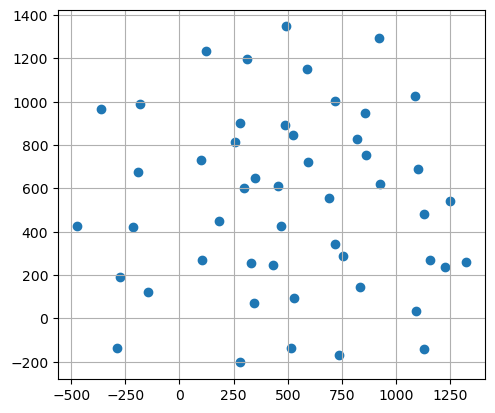

In [4]:
gdf.plot(aspect='equal')
plt.grid()

### Setting the extent to which the data will be clipped

In [5]:
bbox = [0,972, 0, 1069]

### Clipping the data

The data is clipped with the built-in function ``clip_by_bbox()``.

In [6]:
gdf_clipped = gg.vector.clip_by_bbox(gdf=gdf, 
                                     bbox=bbox)

gdf_clipped.head()

,geometry,X,Y
0,POINT (344.32400 73.45078),344.32,73.45
1,POINT (529.46815 95.88742),529.47,95.89
2,POINT (432.04380 246.92094),432.04,246.92
3,POINT (331.01114 255.68397),331.01,255.68
4,POINT (718.13118 342.79887),718.13,342.80


### Checking the number of data points

When printing the lengths of the GeoDataFrames, it can that the number of points was reduced to half. 

In [7]:
print(len(gdf))
print(len(gdf_clipped))

50
25


### Plotting the data

By plotting the data, it can be seen that the number of points have been reduced. 

(-250.0, 1400.0)

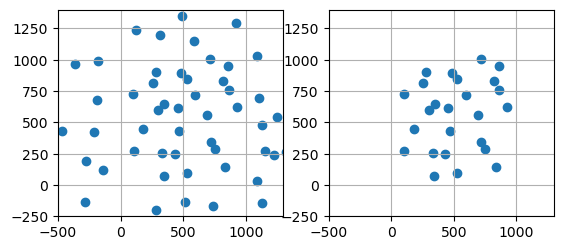

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()
ax1.set_xlim(-500, 1300)
ax1.set_ylim(-250, 1400)


gdf_clipped.plot(ax=ax2, aspect='equal')
ax2.grid()
ax2.set_xlim(-500, 1300)
ax2.set_ylim(-250, 1400)

### Additional Arguments

Additional arguments can be passed to the function to reset the index and to drop columns. These arguments are true by default. 

In [9]:
gdf_clipped = gg.vector.clip_by_bbox(gdf=gdf, 
                                     bbox=bbox,
                                     reset_index=True,
                                     drop_index=True,
                                     drop_id=True, 
                                     drop_points=True, 
                                     drop_level0=True,
                                     drop_level1=True)

gdf_clipped.head()

,geometry,X,Y
0,POINT (344.32400 73.45078),344.32,73.45
1,POINT (529.46815 95.88742),529.47,95.89
2,POINT (432.04380 246.92094),432.04,246.92
3,POINT (331.01114 255.68397),331.01,255.68
4,POINT (718.13118 342.79887),718.13,342.80


## Clipping Vector Data by a polygon

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import gemgis as gg

gdf = gpd.read_file(file_path + 'randompoints.shp')

gdf.head()

,id,geometry
0,None,POINT (281.52576 902.08681)
1,None,POINT (925.86670 618.57679)
2,None,POINT (718.13118 342.79887)
3,None,POINT (331.01114 255.68397)
4,None,POINT (300.08278 600.53525)


### Plotting the Data

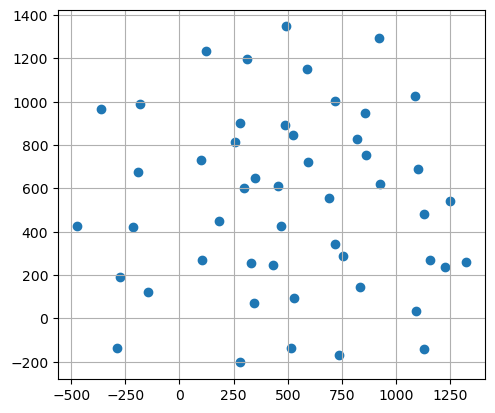

In [11]:
gdf.plot(aspect='equal')
plt.grid()

### Setting the polygon to which the data will be clipped

In [12]:
from shapely.geometry import Polygon

polygon = Polygon([(0,0),(972, 0), (972,1069), (0, 1069)])

polygon.wkt

'POLYGON ((0 0, 972 0, 972 1069, 0 1069, 0 0))'

### Clipping the data

The data is clipped with the built-in function ``clip_by_polygon()``.

In [13]:
gdf_clipped = gg.vector.clip_by_polygon(gdf=gdf, 
                                        polygon=polygon)

gdf_clipped.head()

,geometry
0,POINT (344.32400 73.45078)
1,POINT (529.46815 95.88742)
2,POINT (432.04380 246.92094)
3,POINT (331.01114 255.68397)
4,POINT (718.13118 342.79887)


### Checking the number of data points

When printing the lengths of the GeoDataFrames, it can that the number of points was reduced to half. 

In [14]:
print(len(gdf))
print(len(gdf_clipped))

50
25


### Plotting the data

By plotting the data, it can be seen that the number of points have been reduced. 

(-250.0, 1400.0)

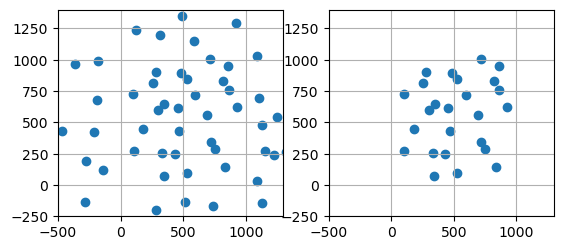

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()
ax1.set_xlim(-500, 1300)
ax1.set_ylim(-250, 1400)


gdf_clipped.plot(ax=ax2, aspect='equal')
ax2.grid()
ax2.set_xlim(-500, 1300)
ax2.set_ylim(-250, 1400)

### Additional Arguments

Additional arguments can be passed to the function to reset the index and to drop columns. These arguments are true by default. 

In [16]:
gdf_clipped = gg.vector.clip_by_polygon(gdf=gdf, 
                                        polygon=polygon,
                                        reset_index=True,
                                        drop_index=True,
                                        drop_id=True, 
                                        drop_points=True, 
                                        drop_level0=True,
                                        drop_level1=True)

gdf_clipped.head()

,geometry
0,POINT (344.32400 73.45078)
1,POINT (529.46815 95.88742)
2,POINT (432.04380 246.92094)
3,POINT (331.01114 255.68397)
4,POINT (718.13118 342.79887)


## Clipping Raster Data by extent

In [17]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

raster.read()

array([[[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
         622.05786],
        [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
         622.06714],
        [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
         622.08923],
        ...,
        [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
         366.3984 ],
        [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
         363.96167],
        [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
         361.78635]]], dtype=float32)

### Plotting the input raster

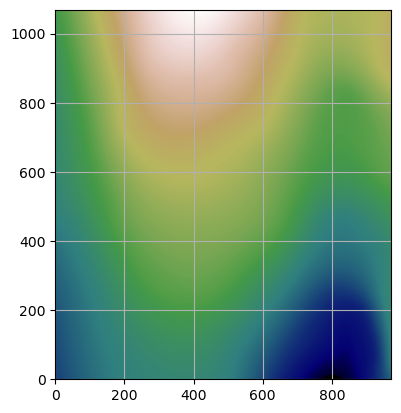

In [18]:
plt.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069])
plt.grid()

### Setting the extent to which the data will be clipped

In [19]:
bbox = [250,750,250,750]

### Clipping the raster 

The data is clipped with the built-in function ``clip_by_bbox()``.

In [20]:
raster_clipped = gg.raster.clip_by_bbox(raster=raster, 
                                        bbox=bbox)

### Plotting the result

(0.0, 1069.0)

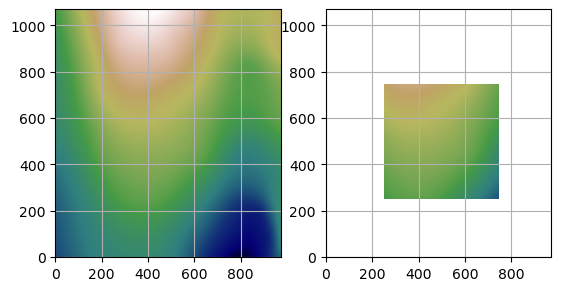

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069], vmin=250, vmax=750)
ax1.grid()
ax1.set_xlim(0,972)
ax1.set_ylim(0,1069)


ax2.imshow(raster_clipped, cmap='gist_earth', extent= [250,750,250,750], vmin=250, vmax=750)
ax2.grid()
ax2.set_xlim(0, 972)
ax2.set_ylim(0, 1069)

### Additional Arguments

Additional arguments can be passed to directly save the clipped raster to disc. 

In [22]:
raster_clipped = gg.raster.clip_by_bbox(raster=raster, 
                                        bbox=bbox,
                                        raster_extent=None,
                                        save_clipped_raster=False,
                                        path='raster_clipped.tif')

## Clipping Raster Data by polygon

In [23]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

### Plotting the input raster

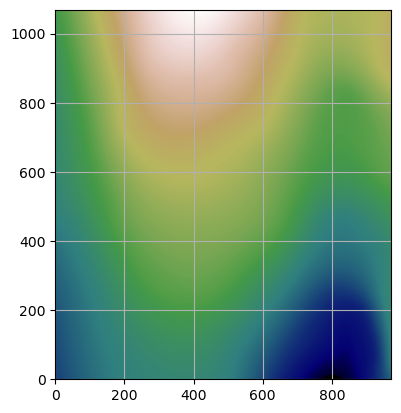

In [24]:
plt.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069])
plt.grid()

### Setting the extent to which the data will be clipped

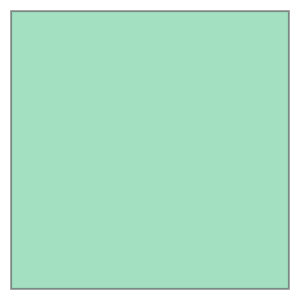

In [25]:
from shapely.geometry import Polygon

polygon = Polygon([(250,250),(750,250), (750,750), (250, 750)])

polygon

### Clipping the raster 

The data is clipped with the built-in function ``clip_by_bbox()``.

In [26]:
raster_clipped = gg.raster.clip_by_polygon(raster=raster, 
                                           polygon=polygon)

### Plotting the result

(0.0, 1069.0)

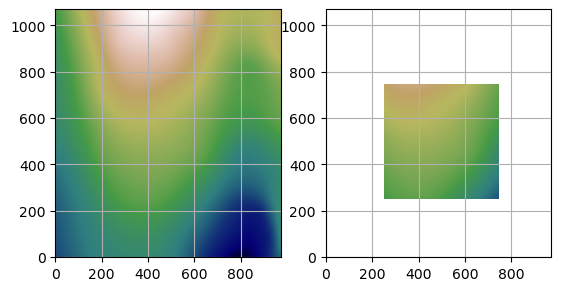

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069], vmin=250, vmax=750)
ax1.grid()
ax1.set_xlim(0,972)
ax1.set_ylim(0,1069)


ax2.imshow(raster_clipped, cmap='gist_earth', extent= [250,750,250,750], vmin=250, vmax=750)
ax2.grid()
ax2.set_xlim(0, 972)
ax2.set_ylim(0, 1069)

### Additional Arguments

Additional arguments can be passed to directly save the clipped raster to disc. 

In [28]:
raster_clipped = gg.raster.clip_by_polygon(raster=raster, 
                                           polygon=polygon,
                                           raster_extent=None,
                                           save_clipped_raster=False,
                                           path='raster_clipped.tif')